In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Ensure 'agriculture.csv' is in the same directory as your notebook,
# or provide the full path to the file.
df = pd.read_csv('agriculture.csv')

In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Andhra Pradesh,Anantapur,Anantapur,Mousambi(Sweet Lime),Mousambi,Medium,08/07/2025,420.0,2110.0,1500.0
1,Andhra Pradesh,Chittor,Palamaner,Cauliflower,Cauliflower,FAQ,08/07/2025,700.0,1500.0,1100.0
2,Andhra Pradesh,East Godavari,Ambajipeta,Banana,Banana - Ripe,Medium,08/07/2025,800.0,1760.0,1280.0
3,Andhra Pradesh,East Godavari,Ravulapelem,Banana,Chakkarakeli(Red),Large,08/07/2025,1500.0,2200.0,1700.0
4,Andhra Pradesh,Guntur,Guntur,Dry Chillies,White,FAQ,08/07/2025,4700.0,7000.0,6400.0


In [4]:
print("\nDataset shape (rows, columns):")
df.shape


Dataset shape (rows, columns):


(17081, 10)

In [5]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17081 entries, 0 to 17080
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              17081 non-null  object 
 1   District           17081 non-null  object 
 2   Market             17081 non-null  object 
 3   Commodity          17081 non-null  object 
 4   Variety            17081 non-null  object 
 5   Grade              17081 non-null  object 
 6   Arrival_Date       17081 non-null  object 
 7   Min_x0020_Price    17081 non-null  float64
 8   Max_x0020_Price    17081 non-null  float64
 9   Modal_x0020_Price  17081 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.3+ MB


In [6]:
# Standardize column names by replacing '_x0020_' with '_'
df.columns = df.columns.str.replace('_x0020_', '_', regex=True)
print("\nCleaned column names:")
print(df.columns.tolist())


Cleaned column names:
['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade', 'Arrival_Date', 'Min_Price', 'Max_Price', 'Modal_Price']


In [7]:
# Convert price columns to numeric, coercing errors to NaN
price_columns = ['Min_Price', 'Max_Price', 'Modal_Price']
for col in price_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nData types after converting price columns:")
df[price_columns].info()


Data types after converting price columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17081 entries, 0 to 17080
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Min_Price    17081 non-null  float64
 1   Max_Price    17081 non-null  float64
 2   Modal_Price  17081 non-null  float64
dtypes: float64(3)
memory usage: 400.5 KB


In [8]:
# Drop rows where critical columns have missing values
original_rows = df.shape[0]
df.dropna(subset=['Modal_Price', 'Commodity', 'Market'], inplace=True)
print(f"\nDropped {original_rows - df.shape[0]} rows with missing values in critical columns.")
print(f"Remaining rows: {df.shape[0]}")


Dropped 0 rows with missing values in critical columns.
Remaining rows: 17081


In [9]:
print("\nDescriptive statistics for numeric columns:")
df.describe()


Descriptive statistics for numeric columns:


,Min_Price,Max_Price,Modal_Price
count,17081.000000,17081.000000,17081.000000
mean,4156.740727,4843.551419,4647.515780
std,4052.427221,4605.408567,4387.779099
min,0.000000,0.000000,3.000000
25%,2000.000000,2500.000000,2400.000000
50%,3050.000000,4000.000000,3600.000000
75%,5000.000000,6000.000000,6000.000000
max,80000.000000,95000.000000,81000.000000


In [10]:
print("\nUnique Commodities:")
print(df['Commodity'].nunique(), "unique commodities.")
print(df['Commodity'].value_counts().head()) # Uncomment to see top commodities

print("\nUnique States:")
print(df['State'].nunique(), "unique states.")
print(df['State'].value_counts().head()) # Uncomment to see top states

print("\nUnique Markets:")
print(df['Market'].nunique(), "unique markets.")
print(df['Market'].value_counts().head()) # Uncomment to see top markets


Unique Commodities:
211 unique commodities.
Commodity
Onion      638
Tomato     610
Potato     606
Brinjal    563
Wheat      550
Name: count, dtype: int64

Unique States:
28 unique states.
State
Tamil Nadu        6701
Uttar Pradesh     2592
Madhya Pradesh    1150
Kerala            1093
Gujarat            820
Name: count, dtype: int64

Unique Markets:
1354 unique markets.
Market
Hosur(Uzhavar Sandhai )             69
Tiruvannamalai(Uzhavar Sandhai )    69
Anna nagar(Uzhavar Sandhai )        66
Thathakapatti(Uzhavar Sandhai )     65
RSPuram(Uzhavar Sandhai )           62
Name: count, dtype: int64


In [11]:
# Convert 'Arrival_Date' to datetime objects
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y', errors='coerce')

print("\n'Arrival_Date' info after conversion:")
df['Arrival_Date'].info()

# Drop rows where date conversion failed (if any)
original_rows_after_date_conv = df.shape[0]
df.dropna(subset=['Arrival_Date'], inplace=True)
print(f"Dropped {original_rows_after_date_conv - df.shape[0]} rows with invalid dates.")
print(f"Remaining rows: {df.shape[0]}")


'Arrival_Date' info after conversion:
<class 'pandas.core.series.Series'>
RangeIndex: 17081 entries, 0 to 17080
Series name: Arrival_Date
Non-Null Count  Dtype         
--------------  -----         
17081 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 133.6 KB
Dropped 0 rows with invalid dates.
Remaining rows: 17081


In [12]:
# Extract year, month, and day of the week
df['Year'] = df['Arrival_Date'].dt.year
df['Month'] = df['Arrival_Date'].dt.month
df['DayOfWeek'] = df['Arrival_Date'].dt.dayofweek # Monday=0, Sunday=6

print("\nFirst 5 rows with new time-based features:")
df[['Arrival_Date', 'Year', 'Month', 'DayOfWeek']].head()


First 5 rows with new time-based features:


,Arrival_Date,Year,Month,DayOfWeek
0,2025-07-08,2025,7,1
1,2025-07-08,2025,7,1
2,2025-07-08,2025,7,1
3,2025-07-08,2025,7,1
4,2025-07-08,2025,7,1


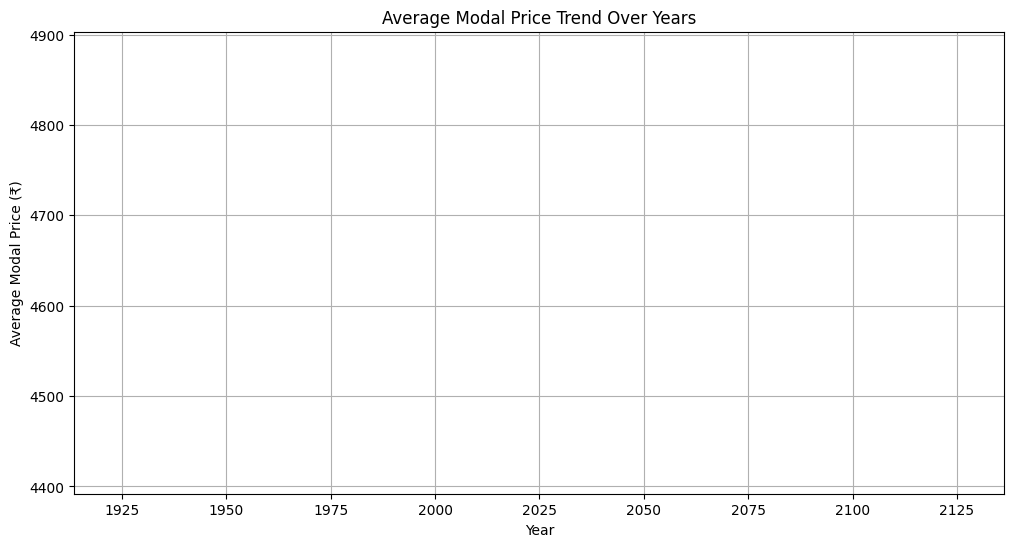

In [13]:
# Average Modal Price per Year
avg_price_per_year = df.groupby('Year')['Modal_Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_per_year, x='Year', y='Modal_Price')
plt.title('Average Modal Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Modal Price (₹)')
plt.grid(True)
plt.show()


Analyzing price distribution for top commodity: Onion


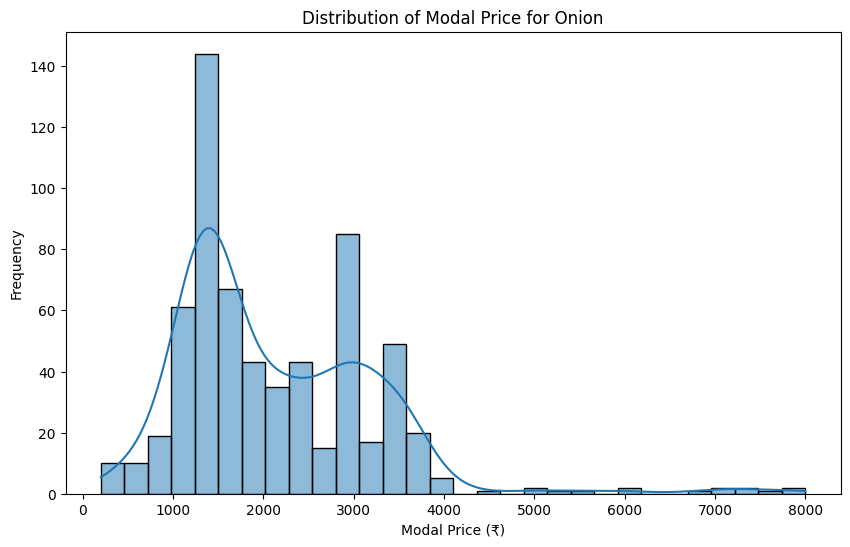

In [14]:
# Select a common commodity for detailed analysis
top_commodity = df['Commodity'].value_counts().idxmax()
print(f"\nAnalyzing price distribution for top commodity: {top_commodity}")

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Commodity'] == top_commodity]['Modal_Price'], kde=True, bins=30)
plt.title(f'Distribution of Modal Price for {top_commodity}')
plt.xlabel('Modal Price (₹)')
plt.ylabel('Frequency')
plt.show()

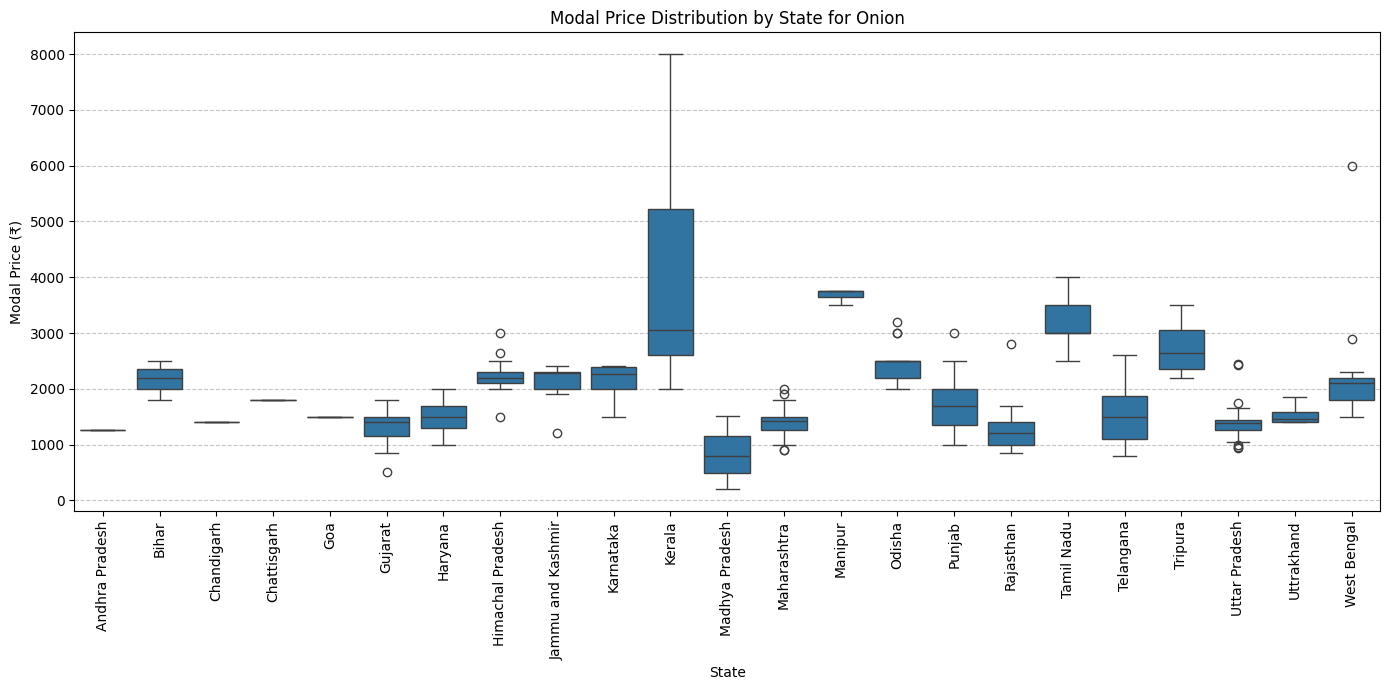

In [15]:
# Let's take the same top commodity
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[df['Commodity'] == top_commodity].sort_values('State'), x='State', y='Modal_Price')
plt.title(f'Modal Price Distribution by State for {top_commodity}')
plt.xlabel('State')
plt.ylabel('Modal Price (₹)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

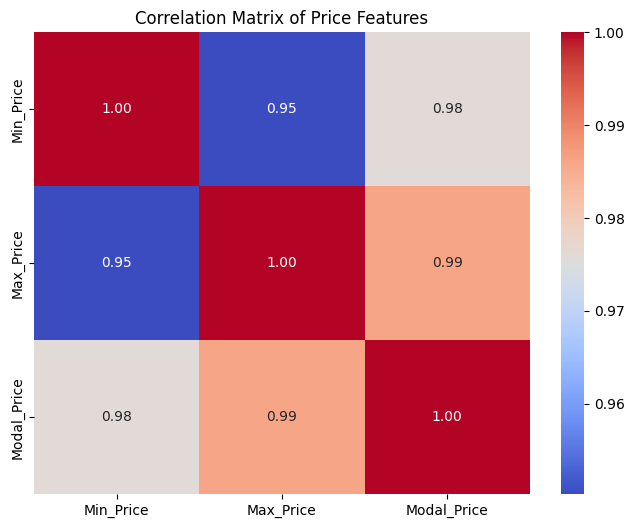

In [16]:
# Calculate the correlation matrix for numeric price columns
price_corr = df[price_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Price Features')
plt.show()


Top 10 Commodities by Number of Unique Markets:
Commodity
Tomato                   583
Onion                    578
Potato                   571
Brinjal                  553
Green Chilli             517
Bhindi(Ladies Finger)    493
Wheat                    437
Bottle gourd             420
Bitter gourd             417
Pumpkin                  389
Name: Market, dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_3076\553900682.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=markets_per_commodity.index, y=markets_per_commodity.values, palette='viridis')


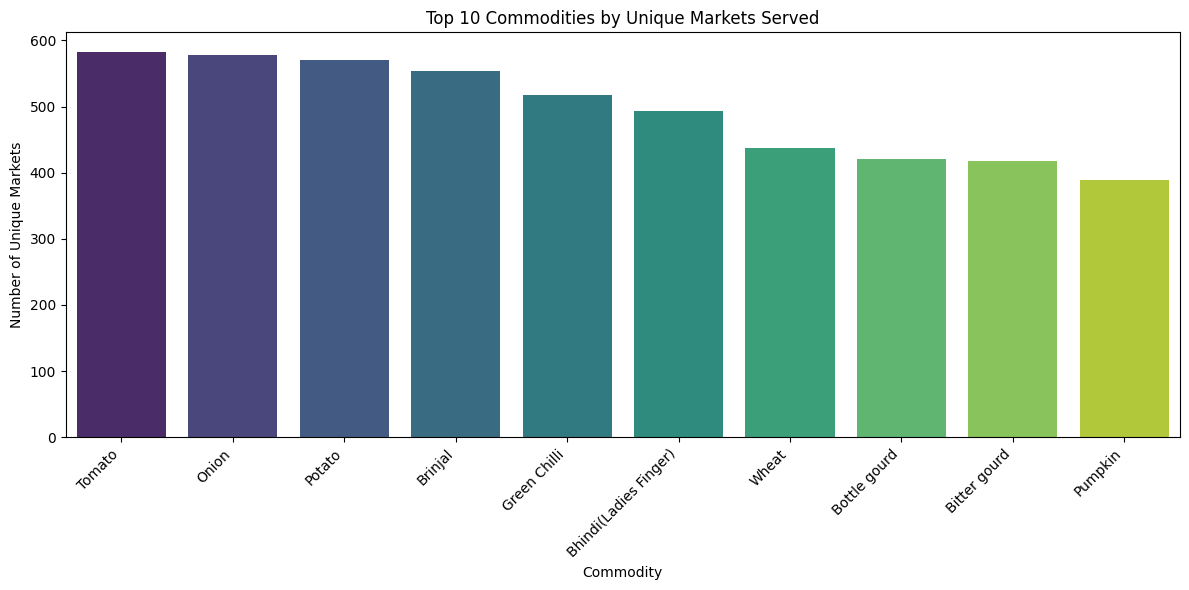

In [17]:
# Count unique markets for each commodity
markets_per_commodity = df.groupby('Commodity')['Market'].nunique().sort_values(ascending=False).head(10)

print("\nTop 10 Commodities by Number of Unique Markets:")
print(markets_per_commodity)

plt.figure(figsize=(12, 6))
sns.barplot(x=markets_per_commodity.index, y=markets_per_commodity.values, palette='viridis')
plt.title('Top 10 Commodities by Unique Markets Served')
plt.xlabel('Commodity')
plt.ylabel('Number of Unique Markets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
# Top 5 markets with highest average modal price for the top commodity
top_5_markets_expensive = df[df['Commodity'] == top_commodity].groupby('Market')['Modal_Price'].mean().nlargest(5)
print(f"\nTop 5 Most Expensive Markets for {top_commodity}:")
print(top_5_markets_expensive)

# Top 5 markets with lowest average modal price for the top commodity
top_5_markets_cheapest = df[df['Commodity'] == top_commodity].groupby('Market')['Modal_Price'].mean().nsmallest(5)
print(f"\nTop 5 Cheapest Markets for {top_commodity}:")
print(top_5_markets_cheapest)


Top 5 Most Expensive Markets for Onion:
Market
North Paravur    6800.0
Darjeeling       6000.0
Pala             5550.0
Palakkad         5400.0
Anchal           5300.0
Name: Modal_Price, dtype: float64

Top 5 Cheapest Markets for Onion:
Market
A lot        200.0
Jaora        250.0
Biaora       300.0
Kalapipal    353.0
Sarangpur    400.0
Name: Modal_Price, dtype: float64


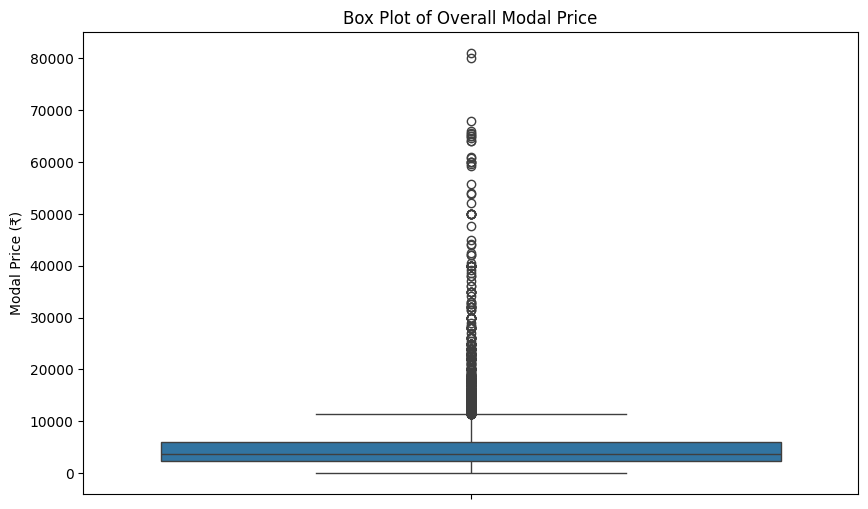

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Modal_Price'])
plt.title('Box Plot of Overall Modal Price')
plt.ylabel('Modal Price (₹)')
plt.show()

In [20]:
# Create a new feature: Price_Range = Max_Price - Min_Price
df['Price_Range'] = df['Max_Price'] - df['Min_Price']

print("\nFirst 5 rows with new 'Price_Range' feature:")
df[['Min_Price', 'Max_Price', 'Modal_Price', 'Price_Range']].head()

# Check descriptive statistics for the new feature
print("\nDescriptive statistics for 'Price_Range':")
print(df['Price_Range'].describe())


First 5 rows with new 'Price_Range' feature:

Descriptive statistics for 'Price_Range':
count    17081.000000
mean       686.810693
std       1470.610660
min      -6405.000000
25%        100.000000
50%        400.000000
75%        800.000000
max      53000.000000
Name: Price_Range, dtype: float64


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Define features (X) and target (y)
# Let's use 'Commodity', 'State', 'District', 'Market', 'Variety', 'Grade', 'Year', 'Month', 'DayOfWeek', 'Min_Price', 'Max_Price'
# We will exclude 'Arrival_Date' as we've extracted features from it, and 'Price_Range' to avoid direct leakage if 'Min_Price'/'Max_Price' are already there.
features = ['Commodity', 'State', 'District', 'Market', 'Variety', 'Grade',
            'Year', 'Month', 'DayOfWeek', 'Min_Price', 'Max_Price']
target = 'Modal_Price'

X = df[features]
y = df[target]

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (17081, 11)
Target (y) shape: (17081,)


In [23]:
# Identify categorical and numerical features for preprocessing
categorical_features = ['Commodity', 'State', 'District', 'Market', 'Variety', 'Grade']
numerical_features = ['Year', 'Month', 'DayOfWeek', 'Min_Price', 'Max_Price']

# Ensure all selected features actually exist in the dataframe
categorical_features = [f for f in categorical_features if f in X.columns]
numerical_features = [f for f in numerical_features if f in X.columns]

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['Commodity', 'State', 'District', 'Market', 'Variety', 'Grade']
Numerical features: ['Year', 'Month', 'DayOfWeek', 'Min_Price', 'Max_Price']


In [24]:
# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler() # Scale numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # One-hot encode categorical features

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing pipeline created.")

Preprocessing pipeline created.


In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (13664, 11)
X_test shape: (3417, 11)
y_train shape: (13664,)
y_test shape: (3417,)


In [26]:
# Create a full pipeline with the preprocessor and a Linear Regression model
linear_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LinearRegression())])

print("Linear Regression pipeline created.")

Linear Regression pipeline created.


In [27]:
# Train the Linear Regression model
print("Training Linear Regression model...")
linear_reg_pipeline.fit(X_train, y_train)
print("Linear Regression model training complete.")

Training Linear Regression model...
Linear Regression model training complete.
Linear Regression model training complete.


In [28]:
# Make predictions on the test set
y_pred_lr = linear_reg_pipeline.predict(X_test)

print("\nFirst 10 Linear Regression predictions:")
print(y_pred_lr[:10])
print("\nFirst 10 actual values:")
print(y_test.head(10).values)


First 10 Linear Regression predictions:
[  845.03112154  7856.38450086  1893.21214703  3493.43514882
 10133.49512757  2411.61695085  4229.43348493  2921.34170676
  2930.0988334   1325.11191767]

First 10 actual values:
[  700.  6000.  1010.  3500. 10150.  2400.  4588.  2928.  3000.  1380.]


In [29]:
# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.2f}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 418225.29
Root Mean Squared Error (RMSE): 646.70
R-squared (R2): 0.97


In [30]:
# Create a full pipeline with the preprocessor and a Random Forest Regressor model
# Using a smaller n_estimators for quicker demonstration; for production, use more.
rf_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

print("\nRandom Forest Regressor pipeline created.")

# Train the Random Forest model
print("Training Random Forest Regressor model (this might take a moment)...")
rf_reg_pipeline.fit(X_train, y_train)
print("Random Forest Regressor model training complete.")


Random Forest Regressor pipeline created.
Training Random Forest Regressor model (this might take a moment)...
Random Forest Regressor model training complete.
Random Forest Regressor model training complete.


In [31]:
# Make predictions with the Random Forest model
y_pred_rf = rf_reg_pipeline.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")


Random Forest Regressor Model Evaluation:
Mean Squared Error (MSE): 301031.47
Root Mean Squared Error (RMSE): 548.66
R-squared (R2): 0.98


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'